# Problem Set 6
## Daniel Tracht

## Problem 1
### Part a
We wish to import the data from the Auto.csv file, and replace the values that seem to be out of place.

In [1]:
import pandas as pd

autos = pd.read_csv('data/Auto.csv')

autos.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

We expect horesepower to be a numeric.

In [2]:
autos.sort_values(by="horsepower").tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe


We have a question mark for our not applicable values.  Let's reimport with the right option.

In [3]:
autos = pd.read_csv('data/Auto.csv', na_values="?")

### Part b
We wish to produce a scatterplot matrix which includes all of the quantatative variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBAA86908>,
      dtype=object)

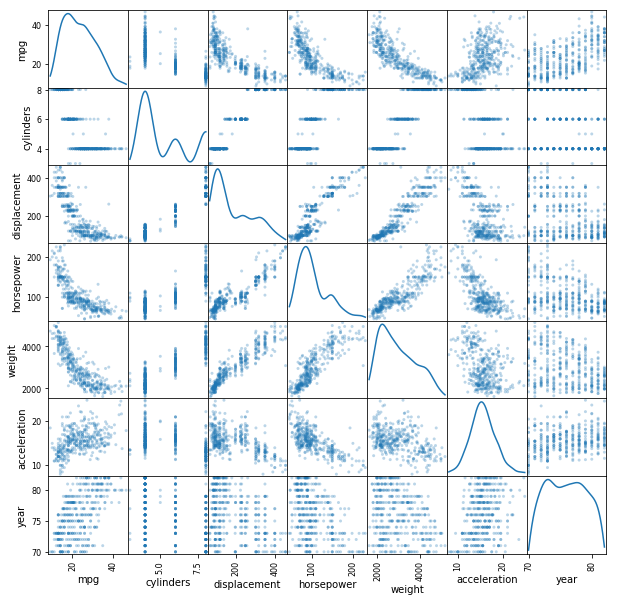

In [5]:
from pandas.plotting import scatter_matrix

# making a data frame of the quantative variables
# while the origin variable is stored as a numeric in our data, it is a categor
# autos is a pretty well known data set
# 1 is USA, 2 is Europe, 3 is Japan
#df_quant = autos[["mpg", "cylinders", "displacement", "horsepower", "weight",
#                "acceleration", "year", "origin"]]
# ^ would be the line you asked for
df_quant = autos[["mpg", "cylinders", "displacement", "horsepower",
                  "weight", "acceleration", "year"]]

#scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6), diagonal="kde")
# ^ would be the line you asked for, but  6, 6 was just too small to see anything
scatter_matrix(df_quant, alpha=0.3, figsize=(10, 10), diagonal="kde")

### Part c
We wish to compute the correlation matrix for the quantative variables:

In [6]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000


### Part d
We wish to estimate a multiple linear regression model:

In [7]:
import statsmodels.api as sm

# definning a column of 1s as the constant
autos["const"] = 1

# making a dataframe of the exogenous variables

exog_origin = autos[["const", "cylinders", "displacement", "horsepower", "weight",
                     "acceleration", "year", "origin"]]
# ^ the line with origin as a quantative, not categorical variable

# We have to make some dummies first
origins = pd.get_dummies(autos["origin"], drop_first=True)
autos = pd.concat([autos, origins], axis=1)
autos.rename(columns={2: "Europe", 3: "Japan"}, inplace=True)

exog = autos[["const", "cylinders", "displacement", "horsepower", "weight",
              "acceleration", "year", "Europe", "Japan"]]

# running the regression
reg1_origin = sm.OLS(endog=autos['mpg'], exog=exog_origin, missing='drop')
results1_origin = reg1_origin.fit()
print(results1_origin.summary())

reg1 = sm.OLS(endog=autos['mpg'], exog=exog, missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        15:26:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

If origin is included in the regression as a categorical variable, we find that $\beta_0$, $\beta_2$, $\beta_4$, $\beta_6$, and $\beta_7$ are statistically significant at the 1% level.  We find that $\beta_1$, $\beta_3$, and $\beta_5$ are not statistically significant at the 10% level.  In words, an automobile model that is 1 year newer would have 0.7508 more miles per gallon, ceteris paribus.

If origin is included as a categorical variable, we find that $\beta_0$, $\beta_2$, $\beta_4$, $\beta_6$, as well as the two coefficients for the origin dummies (being from Europe or Japan relative to the United States) are statistically significant at the 1% level.  We find that $\beta_1$, $\beta_3$, and $\beta_5$ are not statistically significant at the 10% level.  In words, an automobile model that is 1 year newer would have 0.7770 more miles per gallon, ceteris paribus.

### Part e
From the scatterplot, it seems that displacement, horsepower, and weight are most likely to have a non-linear relationship with $mpg_i$.  We wish to estimate a linear regression with a squared term to these three as well as $acceleration_i$:

In [8]:
# Generating the square terms
autos["disp_sq"] = autos["displacement"]**2
autos["horses_sq"] = autos["horsepower"]**2
autos["weight_sq"] = autos["weight"]**2
autos["accel_sq"] = autos["acceleration"]**2

# taking the square terms into a data frame and joining them with the others
exog_sq = autos[["disp_sq", "horses_sq", "weight_sq", "accel_sq"]]
exog2_origin = pd.concat([exog_origin, exog_sq], axis=1)
exog2 = pd.concat([exog, exog_sq], axis=1)

# running the regression with origin as quantatative
reg2_origin = sm.OLS(endog=autos['mpg'], exog=exog2_origin, missing='drop')
results2_origin = reg2_origin.fit()
print(results2_origin.summary())

# running the regression with origin as categorical
reg2 = sm.OLS(endog=autos['mpg'], exog=exog2, missing='drop')
results2 = reg2.fit()
print(results2.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        15:26:27   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.1084      6.696      3.003   

With origin included as a quantatative variable, the adjusted $R^2$ statistic is now 0.866, which is better than the 0.818 from our previous regression.  The statistical significance of the coefficient on $displacement$ has reduced dramatically between the two regressions, and its square's significance is not good either.  The statistical signficiance of the coefficient for $cylinders$ has also fallen dramatically.

With origin included as a categorical variable, the $R^2$ statistic is now 0.866, which is better than the 0.821 from our previous regression.  As with origin as a quantatative variable, the statistical significance of the coefficient on $displacement$ has reduced dramatically between the two regressions, and its square's significance is not good either.  The statistical signficiance of the coefficient for $cylinders$ has also fallen dramatically.


### Part f
We wish to generated the predicted miles per gallon for a car with 6 cylinders, a displacement of 200, horsepower of 100, a weight of 3100, accleration of 15.1, a model year of 1999, and an origin of 1 using our regression including the square terms:

In [9]:
# defining the parameters
const = 1
cylinders = 6
displacement = 200
horsepower = 100
weight = 3100
acceleration = 15.1
# note the 2 digit year, not 4 digit
year = 99
origin = 1
disp_sq = 200**2
horses_sq = 100**2
weight_sq = 3100**2
accel_sq = 15.1**2
europe = 0
japan = 0

predictors_origin = [const, cylinders, displacement, horsepower, weight, acceleration,
                     year, origin, disp_sq, horses_sq, weight_sq, accel_sq]
predictors = [const, cylinders, displacement, horsepower, weight, acceleration, year,
              europe, japan, disp_sq, horses_sq, weight_sq, accel_sq]

print(results2_origin.predict(exog=predictors_origin))
print(results2.predict(exog=predictors))

[38.7321111]
[38.83998021]


With origin as a quantative variable, our model predicts that such a car would get about 38.73 miles per gallon.  With origin as a categorical variable, out model predicts that such a car would get about 38.84 miles per gallon.

## Problem 2
### Part a
For this, we wish to compute the Euclidean distance between each observation and the origin.  For observation 1, this is 3.  For observation 2, this is 2.
sqrt(10), about 3.16
sqrt(5), about 2.23
sqrt(2), about 1.41
sqrt(3), about 1.73

### Part b
For this, we wish to learn what the KNN prediction for the origin is when $K = 1$.  This is Green.  As we computed above, the closest observation to the origin is observation 5.  It's value is Green.  So when $K = 1$ , we would classify the origin as Green as well.

### Part c
For this, we wish to learn what the KNN prediction for the origin is when $K = 3$.  This is Red.  As we computed above, the closest three observations are observations 5, 6, and 2.  While observation 5 is Green, both Observations 6 and 2 are Red.  Thus, when $K = 3$, we would classify the origin as Red.

### Part d
If the Bayes optimal decision boundary in the problem is highly non-linear, then we would expect that the best value of K would be ???

### Part e
For this, we wish to use Python to estimate the KNN classifer of the test point $X_1 = X_2 = X_3 = 1$ with $K = 2$

In [10]:
from sklearn import neighbors

# Creating our data
# Observation 7 added as our target, with Green Y randomly
df = pd.DataFrame({"X_1": [0, 2, 0, 0, -1, 1, 1],
                  "X_2": [3, 0, 1, 1, 0, 1, 1],
                  "X_3": [0, 0, 3, 2, 1, 1, 1],
                  "Y": ["R", "R", "R", "G", "G", "R", "G"]},
                 index=[1,2,3,4,5,6,7])
df_train = df[0:6]
X_train = df_train[["X_1", "X_2", "X_3"]]
y_train = df_train["Y"]

df_test = df[6:7]
X_test = df_test[["X_1", "X_2", "X_3"]]
y_test = df_test["Y"]

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train).score(X_test, y_test)


0.0

For $K=3$, our dummy test of Green was wrong, so it must be that it is Red.  I'm sure that there is a better way to do this, but I was following the code presented it class.

## Problem 3

For this problem, we want to analyize the same auto data as in Problem 1 using a multivariable logisitic regression.  First, we need to create a binary variable to study.



In [11]:
# find median of column
median_mpg = autos["mpg"].median()
# begin new variable at 0
autos["mpg_high"] = 0
# replace values for which mpg is greater than the median
autos.loc[(autos["mpg"] > median_mpg), "mpg_high"] = 1

### Part a
For this problem, we wish to estimate a logistic regression of our new binary variable on the renamed regressors from Problem 1.

In [12]:
import numpy as np
import statsmodels.api as sm

# Renaming columns to desired names
autos.rename(columns={"cylinders": "cyl", "displacement": "dspl",
                      "horsepower" : "hpwr", "weight" : "wgt",
                      "acceleration" : "accl", "year" : "yr", "origin" : "orgn"}, inplace=True)

# Dropping na values for logit analysis
autos.dropna(inplace=True)

# Create matrices of X and y values
# Useful when splitting in the next part
X_origin = autos[["cyl", "dspl", "hpwr", "wgt", "accl", "yr", "orgn"]].values
X = autos[["cyl", "dspl", "hpwr", "wgt", "accl", "yr", "Europe", "Japan"]].values
y = autos["mpg_high"].values

# Adding a constant to our X matrix
num_obs = X.shape[0]
const_vec = np.ones(num_obs).reshape((num_obs, 1))
Xconst_origin = np.hstack((const_vec, X_origin))
Xconst = np.hstack((const_vec, X))

# Running the model using statsmodel.api
LogitModel_origin = sm.Logit(y, Xconst_origin)
LogitReg_origin = LogitModel_origin.fit()
print(LogitReg_origin.summary())

LogitModel = sm.Logit(y, Xconst)
LogitReg = LogitModel.fit()
print(LogitReg.summary())

Optimization terminated successfully.
         Current function value: 0.189320
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:                  0.7265
Time:                        15:26:29   Log-Likelihood:                -74.213
converged:                       True   LL-Null:                       -271.30
                                        LLR p-value:                 4.235e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.7150      6.140     -3.700      0.000     -34.749     -10.681
x1            -0.0633      0.

When including origin as a quantatative variable, we find that $\beta_0$, $\beta_4$, and $\beta_6$, which are the coefficients for the constant, the weight, and the year, are statistically significant at the 5 percent level.

When inclduing origin as a categorical variable, we find that $\beta_0$, $\beta_4$, $\beta_6$, and $\beta_7$, which are the coefficients for the constant, the weight, the year, and being from Japan, are statistically significant at the 5 percent level.

### Part b
We wish to randomly and equally divide the data in a training set and a test set.

In [13]:
# It seems that train_test_split is is model_selection, not cross_validation
from sklearn.model_selection import train_test_split
# following from the problem set
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.5, random_state = 10)
X_train_origin, X_test_origin, y_train_origin, y_test_origin = \
    train_test_split(X_origin, y, test_size = 0.5, random_state = 10)

### Part c
We wish to estimate a logistic regression on the training set using the given method

In [14]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression
LogReg_origin = LogisticRegression(random_state=0, solver="lbfgs", max_iter=1000)
train_origin = LogReg_origin.fit(X_train_origin, y_train_origin)
print("With origin as a quantatative variable:")
print("Intercept:", train_origin.intercept_)
print("Betas 1 through 6", train_origin.coef_[0,0:6])
print("Beta 7", train_origin.coef_[0,6:7])

LogReg = LogisticRegression(random_state=0, solver="lbfgs", max_iter=1000)
train = LogReg.fit(X_train, y_train)
print("With origin as a categorical variable:")
print("Intercept:", train.intercept_)
print("Betas 1 through 6", train.coef_[0,0:6])
print("Betas 7 and 8", train.coef_[0,6:8])

With origin as a quantatative variable:
Intercept: [-30.29184382]
Betas 1 through 6 [-0.99645974  0.02130091  0.01681134 -0.00809184  0.14283266  0.65319314]
Beta 7 [0.41513925]
With origin as a categorical variable:
Intercept: [-29.77528723]
Betas 1 through 6 [-0.95411633  0.02123185  0.01677392 -0.00829327  0.1353172   0.65853586]
Betas 7 and 8 [0.66594604 0.33380007]


### Part d
We wish to create predicted values for our test data using our training set and calculate a confusion matrix and classification report.

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Predict new values from our logistic regressions
y_pred_origin = LogReg_origin.predict(X_test_origin)
y_pred = LogReg.predict(X_test)

confusion_matrix_origin = confusion_matrix(y_test_origin, y_pred_origin)
print(confusion_matrix_origin)
print(classification_report(y_test_origin, y_pred_origin))


confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[91 14]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       105
           1       0.86      0.92      0.89        91

   micro avg       0.89      0.89      0.89       196
   macro avg       0.89      0.89      0.89       196
weighted avg       0.90      0.89      0.89       196

[[90 15]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       105
           1       0.85      0.92      0.88        91

   micro avg       0.89      0.89      0.89       196
   macro avg       0.89      0.89      0.89       196
weighted avg       0.89      0.89      0.89       196



When including origin as a quantatative variable, we are able to correctly classify 91 out of 105 low-mpg cars, and 84 out of 91 high-mpg cars.  Respectively these shares are 87 and 92 percent.  Of the 98 cars that we classify as low-mpg cars, only 91 actually are.  Of the 108 cars we classify as high-mpg cars, only 84 actually are.  Respectively, these shares are 93 and 86 percent.  Using the average of these, as reflected in the f1-score column of the classification report, we might conclude that our model is better at classifying low-mpg cars than high-mpg cars.

When including origin as a categorical variable, we are able to correctly classify 90 out of 105 low-mpg cars, and 84 out of 91 high-mpg cars.  Respectively these shares are 86 and 92 percent.  Of the 97 cars that we classify as low-mpg cars, only 90 actually are.  Of the 109 cars we classify as high-mpg cars, only 84 actually are.  Respectively, these shares are 93 and 85 percent.  Using the average of these, as reflected in the f1-score column of the classification report, we might conclude that our model is better at classifying low-mpg cars than high-mpg cars.